<a href="https://colab.research.google.com/github/Earghand/COGS108_Repo/blob/main/COGS108_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Overview**

With this year falling on an election year, social media has risen in being a platform to convey political ideology. TikTok, a social media platform that recently rose to fame in the United States, has set the stage for users to express their political ideologies in short videos. We decided to gather data leveraging various political hashtags to see if we can predict if a political TikTok is left- or right-leaning.


# **Names**

*   Elias Arghand
*   Elias Fang
*   Norman Ta
*   Wesley Wang
*   Vivian Wu


# **Research Question**

Can we predict if a politically-focused TikTok video will be left- or right-leaning?

# **Background and Prior Work**

The social media platform known as TIkTok is an app created by ByteDance Ltd. to cultivate creativity among its users through short videos grouped by hashtags and genre. Since its conception in September 2016, TikTok has risen in popularity around the world, especially among the younger demographic aged 16-24 [1]. With the recent 2020 election, social media platforms witnessed a surge in politically-related content. This year's election was the first election for TikTok since its rise to popularity and so naturally, political TikTok videos consisting of activism and awareness began surfacing among its users [2]. This makes sense as it is well known that social media has an influence on human beliefs and behaviors.

Through personal experience using the TikTok platform, we have seen how the app's system heavily relies on the use of hashtags. With the influx of political TikTok videos, we observed the specific hashtags that were used by creators posting these videos. Among these hashtags are election candidate names, party affiliation, and political ideology. It was interesting to see how we could anticipate the content of the video based on the hashtags being used. This was more difficult, however, when hashtags reflecting multiple parties were used. This led us to ask whether or not there was a way to accurately predict the content of TikTok videos based on their hashtags and video descriptions.

One past study we found on TikTok in the context of the election focused on TikTok's algorithm for suggesting content to its users. Jack Brandy, a PhD student studying AI, ethics, and media, discovered that unlike other platforms, which rely on "friends" and "followers" to suggest relevant content, TikTok's suggestion algorithm focuses primarily on popular videos chosen by all of its users [3]. With this in mind, we know that the popular political videos we are analyzing truly are popular among the primary user demographic of the platform.

TikTok has no official API available for use to use, so to retrieve the necessary data to answer our research question, we use an Unofficial TikTok API developed by David Teather, a Computer Science student from Wisconsin [4]. With this, we are able to find the most popular TikTok videos related to the 2020 election and analyze their hashtags and descriptions.

References:
- [1] https://www.businessofapps.com/data/tik-tok-statistics/#:~:text=TikTok%20demographics,and%2025%2D34%20year%20olds
- [2] https://www.vogue.com/article/tiktok-activism-president-trump-rally
- [3] https://towardsdatascience.com/new-study-on-tiktoks-algorithms-and-trump-s-tulsa-rally-508ffb2a5ac5
- [4] https://github.com/davidteather/TikTok-Api

# **Hypothesis**

We hypothesize that we will be able to predict whether or not a Tiktok is left-leaning or right-leaning through leveraging ML models [insert what we use here]. We further predict that Tiktok features such as hashtags, descriptions, likes, and play counts will greatly contribute to the sentiment of a video. Possible drawbacks to our predictive model may include that given hashtags may not reflect the sentiment of a video or its contents. 

# **Dataset(s)**

Dataset 1:
*   Name: trump2020.json
*   Link:
*   Number of Observations: 500
*   Description: This dataset includes the json file format of videos with the hashtag trump2020, video descriptions, other hashtags, like count, play count, and soundtrack

Dataset 2:
*   Name: biden2020.json
*   Link:
*   Number of Observations: 500
*   Description: This dataset includes the json file format of videos with the hashtag biden2020, video descriptions, other hashtags, like count, play count, and soundtrack







# **Setup**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import itertools
import json
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

import seaborn as sns
sns.set()
sns.set_context('talk')

# Import nltk package 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
import re
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
presidential_polls_avg_url = 'https://projects.fivethirtyeight.com/2020-general-data/presidential_poll_averages_2020.csv'
df_presidential_polls_avg = pd.read_csv(presidential_polls_avg_url)

In [ ]:
df_presidential_polls_avg.head(10)

,cycle,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,2020,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81,30.83
1,2020,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.13,52.10
2,2020,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49,33.52
...,...,...,...,...,...,...
7,2020,Texas,11/3/2020,Joseph R. Biden Jr.,47.47,47.45
8,2020,Tennessee,11/3/2020,Joseph R. Biden Jr.,40.99,41.42
9,2020,South Dakota,11/3/2020,Joseph R. Biden Jr.,39.05,39.04


In [ ]:
df_presidential_polls_avg.shape

(29085, 6)

In [ ]:
df_presidential_polls_avg = df_presidential_polls_avg.drop(columns=['cycle'])
df_presidential_polls_avg_trump = df_presidential_polls_avg[df_presidential_polls_avg['candidate_name'] == 'Donald Trump']
df_presidential_polls_avg_biden = df_presidential_polls_avg[df_presidential_polls_avg['candidate_name'] == 'Joseph R. Biden Jr.']

In [ ]:
df_presidential_polls_avg_trump

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
56,Wyoming,11/3/2020,Donald Trump,61.97,62.31
57,Wisconsin,11/3/2020,Donald Trump,43.67,43.71
58,West Virginia,11/3/2020,Donald Trump,61.90,62.14
...,...,...,...,...,...
29082,California,2/27/2020,Donald Trump,34.67,34.70
29083,Arizona,2/27/2020,Donald Trump,47.79,48.07
29084,Alabama,2/27/2020,Donald Trump,59.15,59.14


In [ ]:
df_presidential_polls_avg_biden 

,state,modeldate,candidate_name,pct_estimate,pct_trend_adjusted
0,Wyoming,11/3/2020,Joseph R. Biden Jr.,30.81,30.83
1,Wisconsin,11/3/2020,Joseph R. Biden Jr.,52.13,52.10
2,West Virginia,11/3/2020,Joseph R. Biden Jr.,33.49,33.52
...,...,...,...,...,...
29051,California,2/27/2020,Joseph R. Biden Jr.,59.02,58.83
29052,Arizona,2/27/2020,Joseph R. Biden Jr.,44.47,44.18
29053,Alabama,2/27/2020,Joseph R. Biden Jr.,38.45,38.22


In [ ]:
#Example with average pct of each state about both candidates
unique_dates = df_presidential_polls_avg_biden['modeldate'].unique().tolist()
unique_dates.reverse()
def avgAllDates(date, dataframe):
    df_temp = dataframe[dataframe['modeldate'] == date]
    mean = df_temp.mean()[0]
    return mean

biden_avg_over_time = []
trump_avg_over_time = []
for dates in unique_dates:
    biden_avg_over_time.append(avgAllDates(dates, df_presidential_polls_avg_biden))
    trump_avg_over_time.append(avgAllDates(dates, df_presidential_polls_avg_trump))
    
# df_biden_line_plot_nation = pd.DataFrame({'pct - biden' : biden_avg_over_time, 'pct - trump' : trump_avg_over_time}, index = presidential_modeldate_list)
# df_biden_line_plot_nation.plot.line()

In [ ]:
df_trump_tiktok_hashtag = pd.read_json('trump2020.json')
df_election_tiktok_hashtag = pd.read_json('election.json')
df_biden_tiktok_hashtag = pd.read_json('biden2020.json')
df_president_tiktok_hashtag = pd.read_json('president.json')
df_vote_tiktok_hashtag = pd.read_json('vote.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_trump_tiktok_hashtag

,author,authorStats,challenges,createTime,...,video,vl1,warnInfo,effectStickers
0,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 2982, 'followerCount': 213200, '...","[{'coverLarger': '', 'coverMedium': '', 'cover...",1592347270,...,{'cover': 'https://p16-sign-va.tiktokcdn.com/o...,False,"[{'key': 'elections_entry', 'lang': '', 'text'...",NaN
1,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 37900, 'followerCount': 179100, ...","[{'coverLarger': '', 'coverMedium': '', 'cover...",1603313042,...,{'cover': 'https://p16-sign-va.tiktokcdn.com/o...,False,"[{'key': 'elections_entry', 'lang': '', 'text'...",NaN
2,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 1356, 'followerCount': 699300, '...","[{'coverLarger': '', 'coverMedium': '', 'cover...",1599677637,...,{'cover': 'https://p16-sign-va.tiktokcdn.com/o...,False,"[{'key': 'elections_entry', 'lang': '', 'text'...","[{'ID': '263840', 'name': 'Green Screen'}]"
...,...,...,...,...,...,...,...,...,...
997,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 5689, 'followerCount': 31200, 'f...","[{'coverLarger': '', 'coverMedium': '', 'cover...",1593797141,...,{'cover': 'https://p16-sign-va.tiktokcdn.com/o...,False,"[{'key': 'elections_entry', 'lang': '', 'text'...",NaN
998,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 11800, 'followerCount': 43100, '...","[{'coverLarger': '', 'coverMedium': '', 'cover...",1605633690,...,{'cover': 'https://p16-sign-va.tiktokcdn.com/o...,False,"[{'key': 'elections_entry', 'lang': '', 'text'...",NaN
999,{'avatarLarger': 'https://p16-sign-va.tiktokcd...,"{'diggCount': 14100, 'followerCount': 41900, '...",[{'coverLarger': 'https://p16-amd-va.tiktokcdn...,1603895421,...,{'cover': 'https://p16-sign-va.tiktokcdn.com/o...,False,"[{'key': 'elections_entry', 'lang': '', 'text'...","[{'ID': '263840', 'name': 'Green Screen'}]"


# **Data Cleaning**

1.   Retrieve columns with the like number (diggCount), comment number (commentCount), and play count (playCount) for renaming purposes
2.   Remove columns with information on the creator, video IDs, and any unnecessary columns that we don't use and/or violate privacy
3.   Remove nulls
4.   Remove punctuaions in the video descriptions and lowercase them 


In [ ]:
def retrieveLikesCount(dict):
    retValue = dict['diggCount']
    return retValue

def retrieveCommentCount(dict):
    retValue = dict['commentCount']
    return retValue

def retrieveViewCount(dict):
    retValue = dict['playCount']
    return retValue

def descToLower(string):
    return string.lower()

def reformDataFrame(dataframe):
    # dataframe.lower()
    # dataframe.strip()
    #This method can be changed to include more columns if you need any more columns
    df_temp = dataframe.drop(columns=['author','id','challenges','createTime','digged','duetEnabled','forFriend','shareEnabled','showNotPass','stickersOnItem','stitchEnabled','textExtra','video','vl1','warnInfo','effectStickers','isAd','itemCommentStatus','itemMute','music','officalItem','originalItem','privateItem','secret','duetInfo'])
    df_temp["likesCount"] = df_temp["stats"].apply(retrieveLikesCount)
    df_temp["commentCount"] = df_temp["stats"].apply(retrieveCommentCount)
    df_temp["viewCount"] = df_temp["stats"].apply(retrieveViewCount)
    df_temp = df_temp.drop(columns=['authorStats','stats'])
    df_temp['desc'] = df_temp['desc'].apply(descToLower)
    return df_temp

df_trump_tiktok_hashtag = reformDataFrame(df_trump_tiktok_hashtag)
df_election_tiktok_hashtag = reformDataFrame(df_election_tiktok_hashtag)
df_biden_tiktok_hashtag = reformDataFrame(df_biden_tiktok_hashtag)
df_president_tiktok_hashtag = reformDataFrame(df_president_tiktok_hashtag)
df_vote_tiktok_hashtag = reformDataFrame(df_vote_tiktok_hashtag)

In [ ]:
df_trump_tiktok_hashtag

,desc,likesCount,commentCount,viewCount
0,reply to @nickh1940 #repost share this so more...,4900000,141500,21200000
1,now we wait till he gets home.... #fyp #foryou...,4000000,86700,18800000
2,orange lives matter 🍊 #trump #greenscreen #tha...,3800000,84300,15500000
...,...,...,...,...
997,been waiting all day for this to show up 😍🙌🏼 #...,235300,11700,3400000
998,"part 2, trump gives speech on protest #trump #...",235200,8401,977200
999,#greenscreen this i just a joke lmao don’t be ...,235000,6535,892500


In [ ]:
df_election_tiktok_hashtag

,desc,likesCount,commentCount,viewCount
0,woohoo! congratulations to president-elect #jo...,6800000,200500,22100000
1,united 👊🏼👊🏻👊👊🏿👊🏽👊🏾❤️ (10%) #election #vote #bl...,3900000,52800,14800000
2,i found the episode in season 24 the video was...,3500000,50800,20100000
...,...,...,...,...
497,lets go cmon now pull through #biden2020 #elec...,226800,6273,797700
498,duetting tomorrow with the results! comment wh...,225200,5909,2000000
499,if trump gave a normal concession speech #dona...,225200,3455,1100000


In [ ]:
df_biden_tiktok_hashtag

,desc,likesCount,commentCount,viewCount
0,"we'll be right, thanks. new zealand.. anyone? ...",8300000,86400,34400000
1,ich bin weg ciao ✋🏼 #election2020 #biden2020 #...,7200000,160000,57500000
2,anyways vote biden💙#fyp #foryou #foryoupage #b...,4900000,106100,20900000
...,...,...,...,...
997,#greenscreen #biden2020 #trump2020 #expressiey...,262000,6704,1400000
998,#fyp #biden2020 #trump2020 #vote,261800,5667,2800000
999,#greenscreenvideo john roberts wants all the s...,261800,4301,1200000


In [ ]:
df_president_tiktok_hashtag

,desc,likesCount,commentCount,viewCount
0,i thought it was putin 🥴 #putin #china #presid...,3300000,22900,32600000
1,"at that moment, reagan’s opponent knew he lost...",3100000,12100,11900000
2,#donaldtrump #donald #trump #usapresident #pre...,2700000,29700,34600000
...,...,...,...,...
497,responder a @caaza_uwu albertito #alberto #for...,77700,1131,547500
498,polish cow kinda sus...#polishcow #polishcowda...,77500,1441,580600
499,#duet with @yepleen #election #biden2020 #vote...,77400,1938,514000


In [ ]:
df_vote_tiktok_hashtag

,desc,likesCount,commentCount,viewCount
0,🍦 #icecream #vote @bp_tiktok,7000000,49600,44600000
1,don’t forget to vote #fyp #biden #vote #trump ...,4600000,155400,21300000
2,united 👊🏼👊🏻👊👊🏿👊🏽👊🏾❤️ (10%) #election #vote #bl...,3900000,52800,14800000
...,...,...,...,...
497,rating political signs in my neighborhood part...,216100,676,530400
498,how about you? #usemyvoice #vote,216000,4322,1100000
499,im sorry but this is just wild to me #biden #t...,215700,753,999700


# **Exploratory Analysis**

In our exploratory analysis, we decided to explore the word frequencies of each hastag to see which words occurred the most. This is important because we will take these words into account when training our prediction model

In [ ]:
def nltkRetPos(dict):
    return dict['pos']
def nltkRetNeg(dict):
    return dict['neg']
def nltkRetNeu(dict):
    return dict['neu']

#Set dataframe equal to return of this (dataframe = nltkAnaylsisDesc(dataframe))
def nltkAnalysisDesc(dataframe):
    dataframe['nltkAnalysis'] = dataframe["desc"].apply(analyser.polarity_scores)
    dataframe["negNLTK"] = dataframe["nltkAnalysis"].apply(nltkRetNeg)
    dataframe["posNLTK"] = dataframe["nltkAnalysis"].apply(nltkRetPos)
    dataframe["neuNLTK"] = dataframe["nltkAnalysis"].apply(nltkRetNeu)
    dataframe = dataframe.drop(columns='nltkAnalysis')
    return dataframe

In [ ]:
df_all_hashtags = pd.concat([df_trump_tiktok_hashtag, df_biden_tiktok_hashtag, df_vote_tiktok_hashtag, df_president_tiktok_hashtag, df_election_tiktok_hashtag])

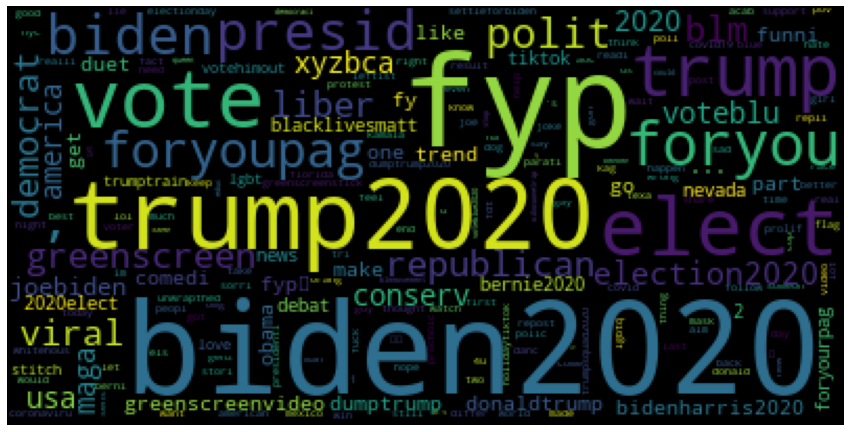

In [ ]:
ps = PorterStemmer()
df_all_hashtags['summaries_tokenized'] = df_all_hashtags['desc'].apply(word_tokenize)
df_all_hashtags['summaries_no_stop'] = df_all_hashtags['summaries_tokenized'].apply(lambda x: [item for item in x if item not in stop_words])
df_all_hashtags['no_stop_stem_sum'] = df_all_hashtags['summaries_no_stop'].apply(lambda x: [ps.stem(y) for y in x])
descriptions = df_all_hashtags['no_stop_stem_sum'].apply(pd.Series).stack()
descriptionFrequency = FreqDist(descriptions)
for punc in string.punctuation:
    del descriptionFrequency[punc]
descFrequencyTotal = dict(itertools.islice(dict(descriptionFrequency).items(), 1000))

wordcloud = WordCloud().generate_from_frequencies(descFrequencyTotal)
plt.imshow(wordcloud)
plt.axis("off")
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

In [ ]:
# sort the words by their frequency in descending order
sorted_freq = {k: v for k, v in sorted(descriptionFrequency.items(), key=lambda item: item[1], reverse=True)}
# get top 20 most frequently used words
first20 = {k: sorted_freq[k] for k in list(sorted_freq)[:20]}

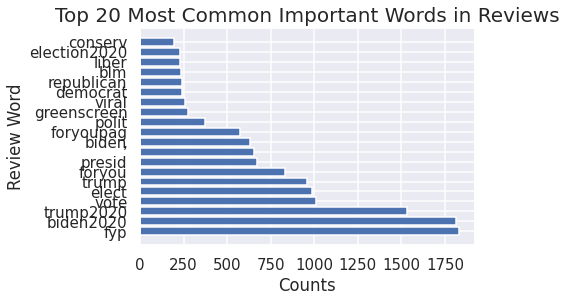

<Figure size 1080x576 with 0 Axes>

In [ ]:

plt.barh(list(first20.keys()), list(first20.values()))
sns.set(rc={'figure.figsize':(8, 7)}, style = 'white')
plt.ylabel('Review Word', fontsize = 16.5)
plt.xlabel('Counts', fontsize = 16.5)
plt.title('Top 20 Most Common Important Words in Reviews', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.figure(figsize=(15, 8))
plt.show()

In [ ]:
def removeTrumpRelatedTags(desc):
    if('#trump' in desc):
        return np.nan
    else:
        return desc

def removeTrumpTagsDF(dataframe):
    dataframe['descCleaned'] = dataframe['desc'].apply(removeTrumpRelatedTags)
    dataframe = dataframe.dropna(subset=['descCleaned'])
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

In [ ]:
def removeBidenRelatedTags(desc):
    desc = desc.lower()
    desc = desc.strip()
    if('#biden' in desc):
        return np.nan
    if('#joebiden' in desc):
        return np.nan
    if('#dumptrump' in desc):
        return np.nan
    else:
        return desc
    
def removeBidenTagsDF(dataframe):
    dataframe['descCleaned'] = dataframe['desc'].apply(removeBidenRelatedTags)
    dataframe = dataframe.dropna(subset=['descCleaned'])
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

As seen with the most frequent words in **#biden2020**, **#trump2020** is still very relevant and vice versa with **#trump2020** and **#biden2020** respectively. From this, we can note that there are videos, regardless of which political side, that uses both hashtags. 

In order to effectively train our predictve model, we must be sure of which side a given political TikTok leans. So, we can narrow down our search to more extreme left and right hashtags.

We will use **#trumptrain2020** to reprsent TikToks that lean **right** and **#bidenharris2020** to represent TikToks that lean **left**.

We will also add a 'support' column to indicate which political direction the TikTok leans: **0 for right, 1 for left**

Finally, we'll merge our dataframes for each json and convert it to a csv

In [ ]:
# read our json files
df_trumptrain_tiktok_hashtag = pd.read_json('trumptrain2020.json')
df_bidenharris_tiktok_hashtag = pd.read_json('bidenharris2020.json')

# clean data and add appropriate support column
df_trumptrain_tiktok_hashtag = reformDataFrame(df_trumptrain_tiktok_hashtag)
df_trumptrain_tiktok_hashtag['support'] = 0
df_bidenharris_tiktok_hashtag = reformDataFrame(df_bidenharris_tiktok_hashtag)
df_bidenharris_tiktok_hashtag['support'] = 1

# merge dataframes
df_combined_hashtag = pd.concat([df_trumptrain_tiktok_hashtag, df_bidenharris_tiktok_hashtag]).sort_index()
df_combined_hashtag = df_combined_hashtag.reset_index(drop=True)

# convert to csv
#compression_opts = dict(method='zip', archive_name='combined_hashtags.csv')
#, compression=compression_opts
df_combined_hashtag.to_csv('combined_hashtags.csv',index=False)

df_combined_hashtag


,desc,likesCount,commentCount,viewCount,support
0,#prolife #progun #conservative #fyp #trumptrai...,779100,28100,4100000,0
1,"we'll be right, thanks. new zealand.. anyone? ...",8300000,86400,34400000,1
2,part 5 lmao. got a lot of mean libs this time🥰...,476600,24400,2700000,0
...,...,...,...,...,...
1997,#trump2020 #trumptrain #trumpsnotracist #trump...,1990,28,11100,0
1998,sweet revenge! #maga #draintheswamp #kag #amer...,1989,73,26800,0
1999,my favorite masks right now. #blm #voteblue #b...,28600,275,268000,1


# **Data Analysis & Results**

In our data analysis, we want to create a prediction model that can accurately predict whether a political TikTok is left- or right-leaning. The steps we intend to take in creating and evaluating our model include:

1.   List item
2.   List item



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[[188  15]
 [ 57 140]]


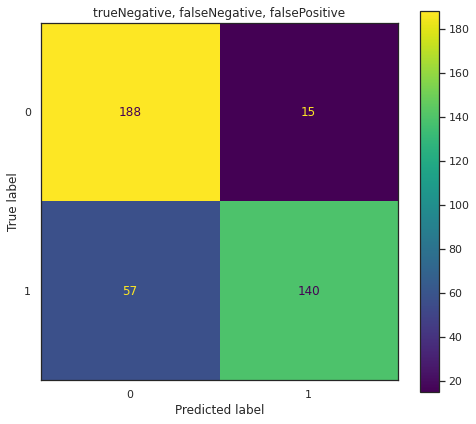

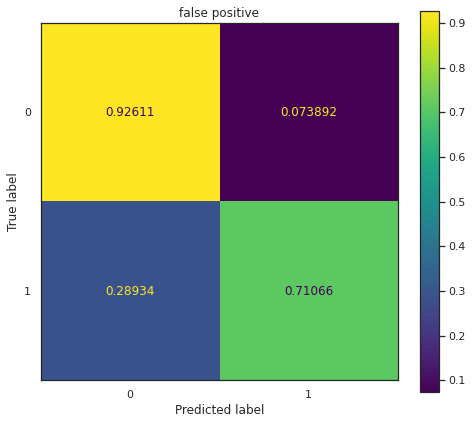

0.82


In [ ]:
dataset = pd.read_csv('combined_hashtags.csv')
nltk.download('stopwords')
corpus = []
for i in range(0, 2000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['desc'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
# print(dataset["support"].values)
# print(dataset.iloc['heart'].values)
y = dataset['support']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# print(X_train[0, 0:10])
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_NB = classifier.predict(X_test)
# print(y_pred_NB)

  

confusions = confusion_matrix(y_test, y_pred_NB)
print(confusions)
# print(confusions[1][0])
trueNegative = confusions[0][0]
falseNegative = confusions[0][1]
falsePositive = confusions[1][0]
truePositive = confusions[1][1]

titles_options = [("trueNegative, falseNegative, falsePositive", None), ("false positive", "true")]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test, normalize=normalize, values_format = '.5g')
    disp.ax_.set_title(title)
plt.show()

#Accuracy of Model
accuracy = (truePositive + trueNegative) / (truePositive + trueNegative + falsePositive + falseNegative)
print(accuracy)

#Precision of model
precision = truePositive/ (truePositive + falsePositive)
# print(precision)

#recall displays ratio of correct predicted Biden to all
bidenRecall = truePositive / (truePositive + falseNegative)
# print(bidenRecall)

#recall displays ratio of correct Trump to all
trumpRecall = trueNegative/(trueNegative + falsePositive)
# print(trumpRecall)


acc = [accuracy]
methods = ['Naive_Bayes']
Accuracy_pos = np.arange(len(methods))


In [ ]:
print(partisanPrediction)

NameError: ignored

In [ ]:
newTest = []
for i in range(0, 500):
    review = re.sub('[^a-zA-Z]', ' ', df_president_tiktok_hashtag['desc'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    newTest.append(review)
cx = CountVectorizer(max_features = 1500)
newTest = cx.fit_transform(newTest).toarray()

#The new numpy array created as a result of the test
partisanPrediction = classifier.predict(newTest)
bidenSupp = np.count_nonzero(partisanPrediction == 1)
trumpSupp = np.count_nonzero(partisanPrediction == 0)
print(bidenSupp)
print(trumpSupp)

In [ ]:
sns.countplot(x="class", data=partisanPrediction)